In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [3]:
import numpy as np
import sympy

# 简介

做图区域
![image](https://ws2.sinaimg.cn/large/69d4185bly1fy8p414tdzj209z06oglo.jpg)

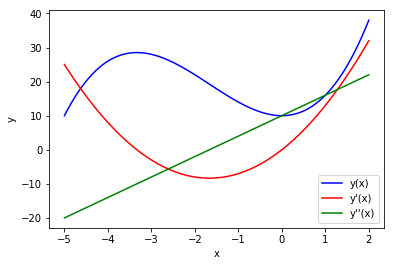

In [4]:
x = np.linspace(-5, 2, 100)
y1 = x**3 + 5*x**2 + 10
y2 = 3*x**2 + 10*x
y3 = 6*x + 10
fig, ax = plt.subplots()
ax.plot(x, y1, color="blue", label="y(x)")
ax.plot(x, y2, color="red", label="y'(x)")
ax.plot(x, y3, color="green", label="y''(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

**交互式与非交互式**

改变图的呈现方式
```python
import matplotlib as mpl
mpl.use('qt4agg')
import matplotlib.pyplot as plt
```
![image](https://wx1.sinaimg.cn/large/69d4185bly1fy8pd43kagj20fa0dj752.jpg)

**修改图的类型**
```python
%matplotlib inline
%config InlineBackend.figure_format='svg'
# or mac os 启用对 retina 的支持
%config InlineBackend.figure_format='retina'
```

# 图（figure）

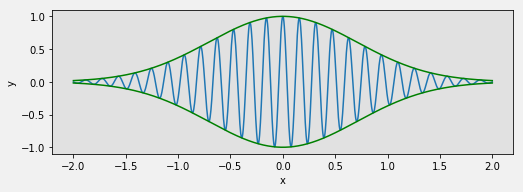

In [8]:
fig = plt.figure(figsize=(8, 2.5), facecolor="#f1f1f1")
# axes coordinates as fractions of the canvas width and height
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
# axisbg 使用 facecolor 替换
ax = fig.add_axes((left, bottom, width, height), facecolor="#e1e1e1")
x = np.linspace(-2, 2, 1000)
y1 = np.cos(40 * x)
y2 = np.exp(-x**2)
ax.plot(x, y1 * y2)
ax.plot(x, y2, 'g')
ax.plot(x, -y2, 'g')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

# 轴

## 图类型

常见类型
![image](https://wx3.sinaimg.cn/large/69d4185bly1fy8pv21cvuj20k90al0tx.jpg)

## 线图

常见属性
![image](https://ws3.sinaimg.cn/large/69d4185bly1fy8pwzt6clj20k606zmyp.jpg)
![image](https://ws2.sinaimg.cn/large/69d4185bly1fy8pxhl8f7j20ka05rdh9.jpg)

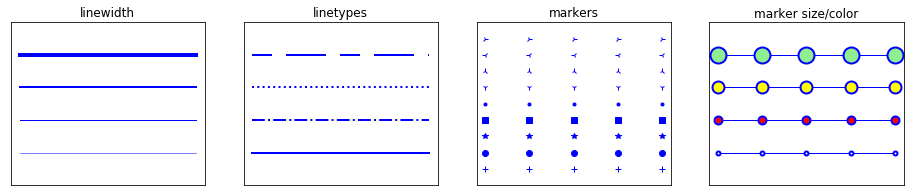

In [18]:
x = np.linspace(-5, 5, 5)
y = np.ones_like(x)
def axes_settings(fig, ax, title, ymax):
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_ylim(0, ymax+1)
    ax.set_title(title)
fig, axes = plt.subplots(1, 4, figsize=(16,3))
# Line width
linewidths = [0.5, 1.0, 2.0, 4.0]
for n, linewidth in enumerate(linewidths):
    axes[0].plot(x, y + n, color="blue", linewidth=linewidth)
    axes_settings(fig, axes[0], "linewidth", len(linewidths))
# Line style
linestyles = ['-', '-.', ':']
for n, linestyle in enumerate(linestyles):
    axes[1].plot(x, y + n, color="blue", lw=2, linestyle=linestyle)
# custom dash style
line, = axes[1].plot(x, y + 3, color="blue", lw=2)
length1, gap1, length2, gap2 = 10, 7, 20, 7
line.set_dashes([length1, gap1, length2, gap2])
axes_settings(fig, axes[1], "linetypes", len(linestyles) + 1)
# marker types
markers = ['+', 'o', '*', 's', '.', '1', '2', '3', '4']
for n, marker in enumerate(markers):
    # lw = shorthand for linewidth, ls = shorthand for linestyle
    axes[2].plot(x, y + n, color="blue", lw=2, ls='', marker=marker)
    axes_settings(fig, axes[2], "markers", len(markers))

# marker size and color
markersizecolors = [(4, "white"), (8, "red"), (12, "yellow"), (16, "lightgreen")]
for n, (markersize, markerfacecolor) in enumerate(markersizecolors):
    axes[3].plot(x, y + n, color="blue", lw=1, ls='-',
        marker='o', markersize=markersize,
        markerfacecolor=markerfacecolor, markeredgewidth=2)
axes_settings(fig, axes[3], "marker size/color", len(markersizecolors))

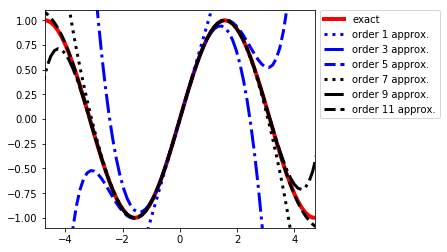

In [19]:
# a symbolic variable for x, and a numerical array with specific values of x
sym_x = sympy.Symbol("x")
x = np.linspace(-2 * np.pi, 2 * np.pi, 100)

def sin_expansion(x, n):
    """
    Evaluate the nth order Talyor series expansion
    of sin(x) for the numerical values in the array x.
    """
    return sympy.lambdify(sym_x, sympy.sin(sym_x).series(n=n+1).removeO(),'numpy')(x)

fig, ax = plt.subplots()

ax.plot(x, np.sin(x), linewidth=4, color="red", label='exact')

colors = ["blue", "black"]
linestyles = [':', '-.', '--']
for idx, n in enumerate(range(1, 12, 2)):
    ax.plot(x, sin_expansion(x, n), color=colors[idx // 3],
        linestyle=linestyles[idx % 3], linewidth=3,
        label="order %d approx." % n)
    
ax.set_ylim(-1.1, 1.1)
ax.set_xlim(-1.5*np.pi, 1.5*np.pi)

# place a legend outsize of the Axes
ax.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.0)
# make room for the legend to the right of the Axes
fig.subplots_adjust(right=.75)

## 图例

图例添加的位置使用`loc`，可选择值有四个，具体如下：
![image](https://ws2.sinaimg.cn/large/69d4185bly1fy8qj7obm1j20qq06w3zg.jpg)

`bbox_to_anchor` 也可以决定图例的位置，`(0,0)` 表示左下角，`(1,1)`表示右上角，值也可以小于 0 和大于 1 表示在轴外边，如下`ax.legend(ncol=4, loc=3, bbox_to_anchor=(0, 1))`，默认情况下图例是垂直排列，使用`ncol`可以进行切割：
![image](https://ws4.sinaimg.cn/large/69d4185bly1fy8qnuyjlhj20ga06r0ti.jpg)

## 文本与注释

常见属性
![image](https://ws4.sinaimg.cn/large/69d4185bly1fy8thi88ssj20h405mmy0.jpg)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


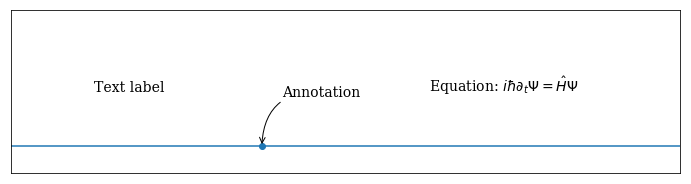

In [29]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.set_yticks([])
ax.set_xticks([])
ax.set_xlim(-0.5, 3.5)
ax.set_ylim(-0.05, 0.25)
ax.axhline(0)

# text label
ax.text(0, 0.1, "Text label", fontsize=14, family="serif")

# annotation
ax.plot(1, 0, "o")
ax.annotate("Annotation",
        fontsize=14, family="serif",
        xy=(1, 0), xycoords="data",
        xytext=(+20, +50), textcoords="offset points",
        arrowprops=dict(arrowstyle="->", connectionstyle="arc3, rad=.5"))

# equation
ax.text(2, 0.1, r"Equation: $i\hbar\partial_t \Psi = \hat{H}\Psi$",
        fontsize=14, family="serif")
plt.show()

## 轴属性

**轴标和标题**
- set_xlabel/set_ylabel
- labelpad
- set_title

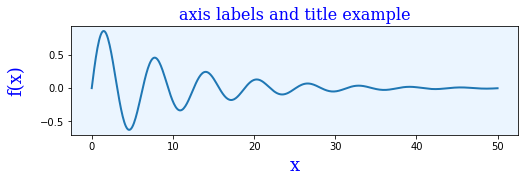

In [28]:
x = np.linspace(0, 50, 500)
y = np.sin(x) * np.exp(-x/10)

fig, ax = plt.subplots(figsize=(8, 2), subplot_kw={'facecolor': "#ebf5ff"})

ax.plot(x, y, lw=2)

ax.set_xlabel("x", labelpad=5, fontsize=18, fontname='serif', color="blue")
ax.set_ylabel("f(x)", labelpad=15, fontsize=18, fontname='serif', color="blue")
ax.set_title("axis labels and title example", fontsize=16, fontname='serif', color="blue")
plt.show()

**轴范围**
- set_xlim/set_ylim

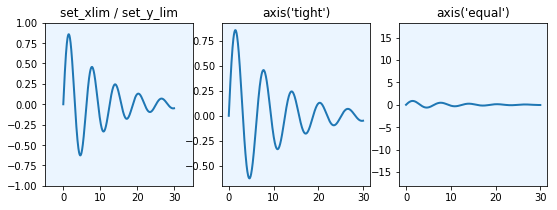

In [32]:
x = np.linspace(0, 30, 500)
y = np.sin(x) * np.exp(-x/10)

fig, axes = plt.subplots(1, 3, figsize=(9, 3), subplot_kw={'facecolor': "#ebf5ff"})

axes[0].plot(x, y, lw=2)
axes[0].set_xlim(-5, 35)
axes[0].set_ylim(-1, 1)
axes[0].set_title("set_xlim / set_y_lim")

axes[1].plot(x, y, lw=2)
axes[1].axis('tight')
axes[1].set_title("axis('tight')")

axes[2].plot(x, y, lw=2)
axes[2].axis('equal')
axes[2].set_title("axis('equal')")
plt.show()

**轴刻度线、刻度标记、网格**

- 主刻度与次刻度
![image](https://wx1.sinaimg.cn/large/69d4185bly1fy8u714sk5j208d05zdfw.jpg)

常见方法，在`Axes.xaxis`、`Axes.yaxis`中
- `set_major_locator`
- `set_minor_locator`

显示指定
- `set_xticks`
- `set_yticks`

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


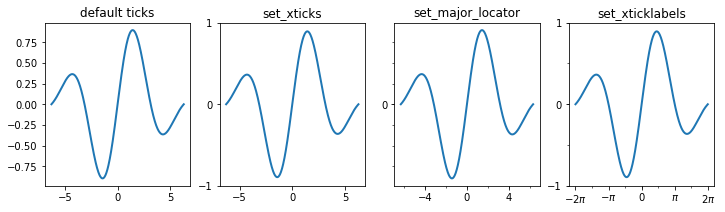

In [34]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 500)
y = np.sin(x) * np.exp(-x**2/20)

fig, axes = plt.subplots(1, 4, figsize=(12, 3))

axes[0].plot(x, y, lw=2)
axes[0].set_title("default ticks")

axes[1].plot(x, y, lw=2)
axes[1].set_title("set_xticks")
axes[1].set_yticks([-1, 0, 1])
axes[1].set_xticks([-5, 0, 5])

axes[2].plot(x, y, lw=2)
axes[2].set_title("set_major_locator")
axes[2].xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
axes[2].yaxis.set_major_locator(mpl.ticker.FixedLocator([-1, 0, 1]))
axes[2].xaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))
axes[2].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(8))

axes[3].plot(x, y, lw=2)
axes[3].set_title("set_xticklabels")
axes[3].set_yticks([-1, 0, 1])
axes[3].set_xticks([-2 * np.pi, -np.pi, 0, np.pi, 2 * np.pi])
axes[3].set_xticklabels([r'$-2\pi$', r'$-\pi$', 0, r'$\pi$', r'$2\pi$'])
x_minor_ticker = mpl.ticker.FixedLocator([-3 * np.pi / 2, -np.pi/2, 0, np.pi/2, 3 * np.pi/2])
axes[3].xaxis.set_minor_locator(x_minor_ticker)
axes[3].yaxis.set_minor_locator(mpl.ticker.MaxNLocator(4))

plt.show()

**网格**

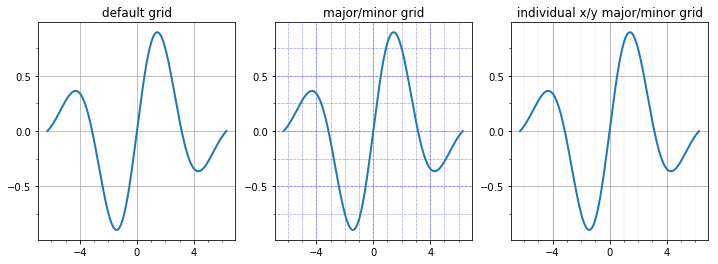

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
x_major_ticker = mpl.ticker.MultipleLocator(4)
x_minor_ticker = mpl.ticker.MultipleLocator(1)
y_major_ticker = mpl.ticker.MultipleLocator(0.5)
y_minor_ticker = mpl.ticker.MultipleLocator(0.25)

for ax in axes:
    ax.plot(x, y, lw=2)
    ax.xaxis.set_major_locator(x_major_ticker)
    ax.yaxis.set_major_locator(y_major_ticker)
    ax.xaxis.set_minor_locator(x_minor_ticker)
    ax.yaxis.set_minor_locator(y_minor_ticker)

axes[0].set_title("default grid")
axes[0].grid()

axes[1].set_title("major/minor grid")
axes[1].grid(color="blue", which="both", linestyle=':', linewidth=0.5)

axes[2].set_title("individual x/y major/minor grid")
axes[2].grid(color="grey", which="major", axis='x', linestyle='-', linewidth=0.5)
axes[2].grid(color="grey", which="minor", axis='x', linestyle=':', linewidth=0.25)
axes[2].grid(color="grey", which="major", axis='y', linestyle='-', linewidth=0.5)

plt.show()

**数学表示法**

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


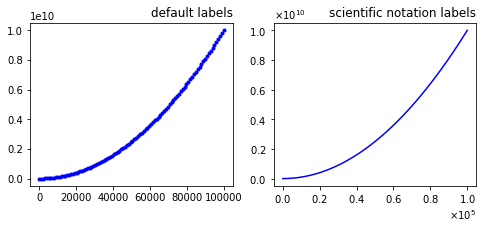

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

x = np.linspace(0, 1e5, 100)
y = x ** 2

axes[0].plot(x, y, 'b.')
axes[0].set_title("default labels", loc='right')

axes[1].plot(x, y, 'b')
axes[1].set_title("scientific notation labels", loc='right')

formatter = mpl.ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
axes[1].xaxis.set_major_formatter(formatter)
axes[1].yaxis.set_major_formatter(formatter)

plt.show()

## 对数图

- loglog 双轴
- semilogx x 轴
- semilogy y 轴

或使用
- set_xscale
- set_yscale

将其设置为 `log`

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


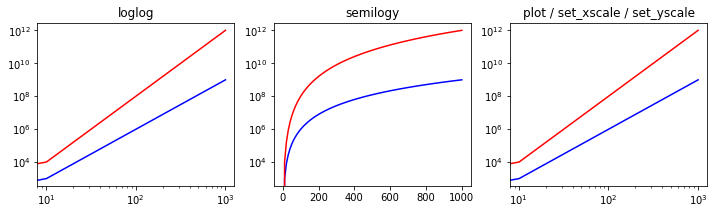

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

x = np.linspace(0, 1e3, 100)
y1, y2 = x**3, x**4

axes[0].set_title('loglog')
axes[0].loglog(x, y1, 'b', x, y2, 'r')

axes[1].set_title('semilogy')
axes[1].semilogy(x, y1, 'b', x, y2, 'r')

axes[2].set_title('plot / set_xscale / set_yscale')
axes[2].plot(x, y1, 'b', x, y2, 'r')
axes[2].set_xscale('log')
axes[2].set_yscale('log')

plt.show()

## 孪生轴

- twinx
- twiny

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


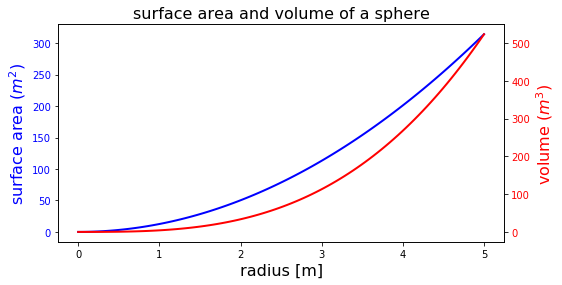

In [39]:
fig, ax1 = plt.subplots(figsize=(8, 4))

r = np.linspace(0, 5, 100)
a = 4 * np.pi * r ** 2 # area
v = (4 * np.pi / 3) * r ** 3 # volume

ax1.set_title("surface area and volume of a sphere", fontsize=16)
ax1.set_xlabel("radius [m]", fontsize=16)

ax1.plot(r, a, lw=2, color="blue")
ax1.set_ylabel(r"surface area ($m^2$)", fontsize=16, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")

# 孪生轴
ax2 = ax1.twinx()
ax2.plot(r, v, lw=2, color="red")
ax2.set_ylabel(r"volume ($m^3$)", fontsize=16, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

plt.show()

## 脊(spine)

- ax.spines()

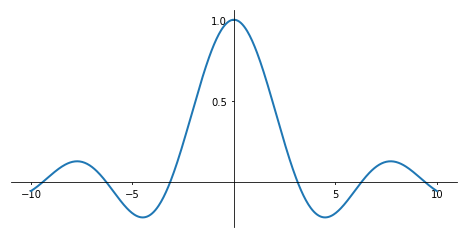

In [40]:
x = np.linspace(-10, 10, 500)
y = np.sin(x) / x

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(x, y, linewidth=2)

# remove top and right spines
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# remove top and right spine ticks
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# move bottom and left spine to x = 0 and y = 0
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))

ax.set_xticks([-10, -5, 5, 10])
ax.set_yticks([0.5, 1])

# give each label a solid background of white, to not overlap with the plot line
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_bbox({'facecolor': 'white',
            'edgecolor': 'white'})
    
plt.show()

# 高级布局

## 插图（insets）

也可以叫局部放大图

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


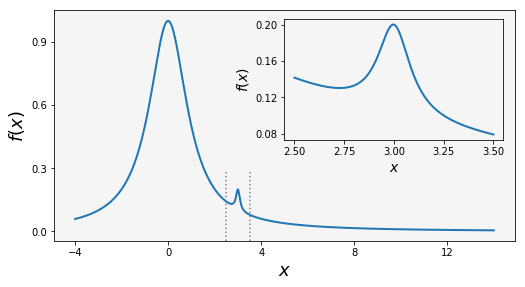

In [43]:
fig = plt.figure(figsize=(8, 4))

def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)
    
# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax, x, f, 14)

plt.show()

## 子图

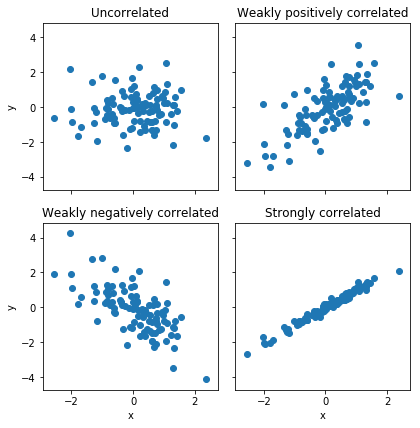

In [45]:
# squeeze 返回的结果是否进行压缩
fig, axes = plt.subplots( 2, 2, figsize=(6, 6), sharex=True, sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95, wspace=0.1,hspace=0.2)
plt.show()

## Subplot2grid

![image](https://ws2.sinaimg.cn/large/69d4185bly1fy8x3vaq0jj20k907pdgz.jpg)

## GridSpec

- wspace/hspace
- width_ratios/height_ratios

![image](https://wx4.sinaimg.cn/large/69d4185bly1fy8x86wm9gj20k20efq5p.jpg)

# 色图（Colormap）

color map 又叫 heat map

- pcolor
- imshow
- contour、contourf

![image](https://ws4.sinaimg.cn/large/69d4185bly1fy8xenvbz9j20kd04bmy1.jpg)

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


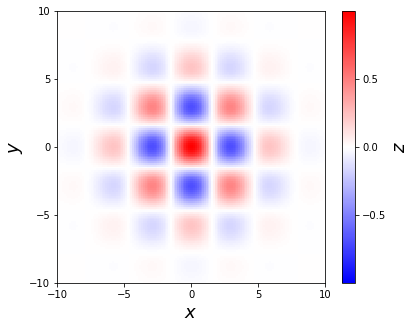

In [59]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))

cb = fig.colorbar(p, ax=ax)
cb.set_label(r"$z$", fontsize=18)
cb.set_ticks([-1, -.5, 0, .5, 1])

plt.show()

# 3D 图

/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


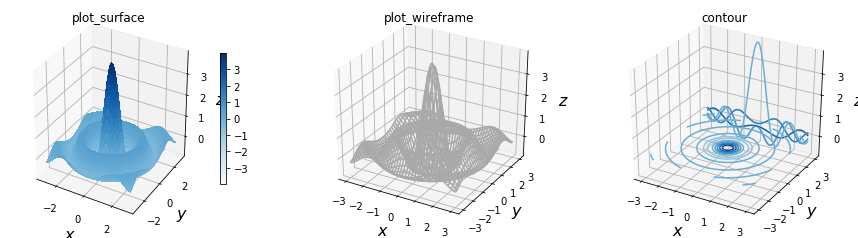

In [64]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=0,
        antialiased=False, norm=norm, cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2, color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm, cmap=mpl.cm.Blues)
axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm, cmap=mpl.cm.Blues) 
title_and_labels(axes[2], "contour")
    
plt.show()